In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preparation**

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# importing data
df = pd.read_csv('/content/drive/Shared drives/IDS 561/Project/data.csv')

In [ ]:
df.sample(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
96342,0.0536,"[""Jerry Murad's Harmonicats""]",0.339,177453,0.561,0,0NlkgbvvdVwJzhpWntNGwX,0.126,5,0.0834,-7.882,1,The Sardar March,0,1950-01-01,0.0473,174.319,0.8460,1950
155285,0.9130,"['Howard Shore', 'Ben Del Maestro']",0.186,195667,0.418,0,5MlY3mwE2eQlmaYHONLTaO,0.962,9,0.1260,-10.947,0,Forth Eorlingas,45,2002-12-02,0.0348,76.704,0.0462,2002
102219,0.1410,"['Galt MacDermot', 'Tom Pierson']",0.548,163960,0.865,0,4RLhdwclHWmNNB6rdkB8Zf,0.000,0,0.2230,-9.372,0,Hair,40,1979,0.2340,137.807,0.3730,1979
96782,0.9760,"['Ludwig van Beethoven', 'Budapest String Quar...",0.338,297867,0.145,0,16dg6byLKfrVwkOjtm1WyY,0.844,9,0.0956,-20.058,1,"String Quartet No. 2 in G Major, Op. 18: IV. A...",0,1952,0.0417,129.572,0.4300,1952
3387,0.9860,['Kenny Kersey and his orchestra'],0.682,172133,0.462,0,5wr7LXZpy8gLBI33tIKSOC,0.920,9,0.1690,-11.152,1,Boogie Woogie Cocktail,3,1937-01-01,0.0320,115.559,0.8320,1937


In [ ]:
# removing square bracket and quotation marks from artist
df['artists'] = df['artists'].apply(lambda x: x[1:-1].replace("'", ''))
# correcting data types 
df['release_date'] = pd.to_datetime(df['release_date'])
# df['year'] = pd.to_datetime(df['year'].apply(lambda x: str(x)+'-01-01'))

In [ ]:
df.sample(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
71525,0.000002,The Smashing Pumpkins,0.209,181533,0.835,0,6912SIXb1G9ql3quOxeCaa,0.873000,1,0.1910,-8.158,1,Jellybelly - Remastered 2012,46,1995-01-01,0.0569,117.003,0.506,1995
164011,0.273000,Allman Brothers Band,0.329,556413,0.379,0,4Wdgu94FYoOO6qzdCbWUv0,0.023500,5,0.2150,-14.236,1,I'm Gonna Move To The Outskirts Of Town - Live...,19,1970-09-18,0.0310,148.075,0.522,1970
131726,0.906000,Herbie Hancock,0.522,357773,0.461,0,3CdXDx4iZT73fft1EZyjt3,0.002230,8,0.1200,-14.018,1,Jack Rabbit - 2005 Digital Remaster,17,1963-08-30,0.0377,145.739,0.706,1963
157114,0.001380,Artificial,0.699,375703,0.641,0,5sFytHHg0zg4qNto5qnO1I,0.053700,7,0.1150,-6.642,0,Prototype - Original Mix,0,2013-12-30,0.1070,127.992,0.385,2013
76478,0.139000,Bad Bunny,0.762,213609,0.861,1,0Lsis3LB0XAK6XlTHXaJk2,0.000001,4,0.0956,-4.075,0,MALDITA POBREZA,79,2020-11-27,0.0652,133.037,0.588,2020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acousticness      174389 non-null  float64       
 1   artists           174389 non-null  object        
 2   danceability      174389 non-null  float64       
 3   duration_ms       174389 non-null  int64         
 4   energy            174389 non-null  float64       
 5   explicit          174389 non-null  int64         
 6   id                174389 non-null  object        
 7   instrumentalness  174389 non-null  float64       
 8   key               174389 non-null  int64         
 9   liveness          174389 non-null  float64       
 10  loudness          174389 non-null  float64       
 11  mode              174389 non-null  int64         
 12  name              174389 non-null  object        
 13  popularity        174389 non-null  int64         
 14  rele

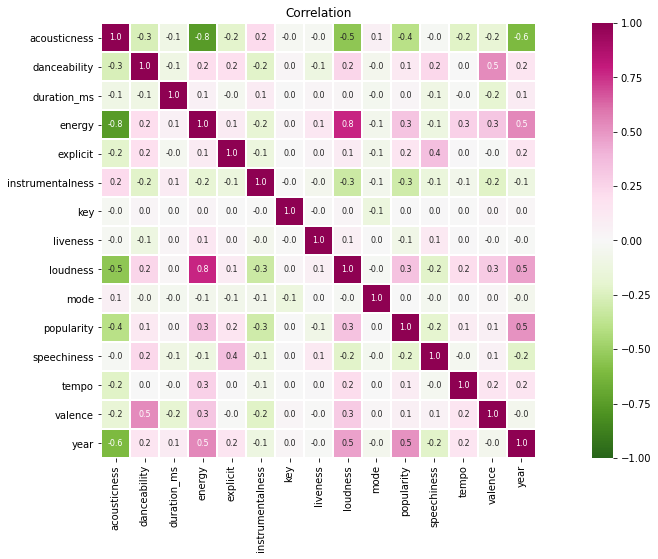

In [ ]:
# finding correlation
corr = df.corr()
# visualizing correlation with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='PiYG_r')
plt.title('Correlation')
plt.show()

In [ ]:
# importing artists data
art_df = pd.read_csv('/content/drive/Shared drives/IDS 561/Project/artists.csv')

In [ ]:
art_df.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [ ]:
# importing tracks data
track_df = pd.read_csv('/content/drive/Shared drives/IDS 561/Project/tracks.csv')

In [ ]:
# removing square bracket and quotation marks from artist
track_df['artists'] = track_df['artists'].apply(lambda x: x[1:-1].replace("'", ''))
track_df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
# correcting data types 
track_df['release_date'] = pd.to_datetime(track_df['release_date'])
track_df['year'] = track_df['release_date'].dt.year

In [ ]:
track_df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [ ]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [ ]:
# reading artists data
artists_df = pd.read_csv('/content/drive/Shared drives/IDS 561/Project/data_by_artist_o.csv')
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

# Time series Analysis

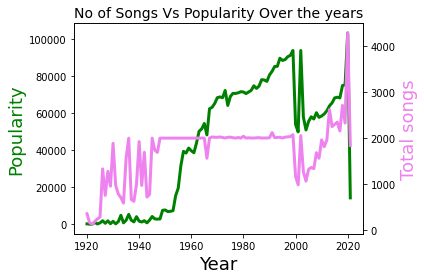

In [ ]:
# Analyzing the increasing count of listeners over the year
year = df.groupby(['year'], as_index=False)
popularity_song = year[['name', 'popularity']].sum()
song_count = year['name'].count()

# dual axis graph
fig, ax1 = plt.subplots()


ax1.plot(popularity_song.year, popularity_song.popularity, color='green', linewidth=3,)
ax1.set_title('No of Songs Vs Popularity Over the years', fontsize=14)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Popularity', color='green', fontsize=18)
# Adding second axis to the graph
ax2 = ax1.twinx()
# No of songs 
ax2.plot(song_count.year, song_count.name, color='violet', linewidth=3)
ax2.set_ylabel('Total songs', color='violet', fontsize=18)
fig.tight_layout()
plt.show()

In [ ]:
popularity_song.index = popularity_song.year
popularity_song.head(5)

,year,popularity
year,,
1920,1920,213
1921,1921,61
1922,1922,11
1923,1923,963
1924,1924,156


In [ ]:
song_count.index = song_count.year
song_count.head(5)

,year,name
year,,
1920,1920,349
1921,1921,156
1922,1922,121
1923,1923,185
1924,1924,236


In [ ]:
# funtion to calculate moving average
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

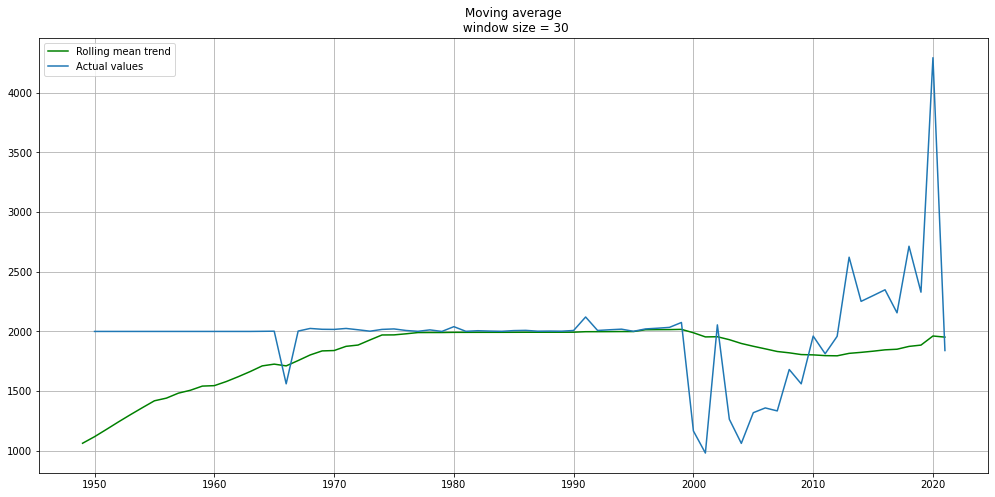

In [ ]:
# plotting moving average for increase in the count of songs over the years
plot_moving_average(song_count.name, 30)

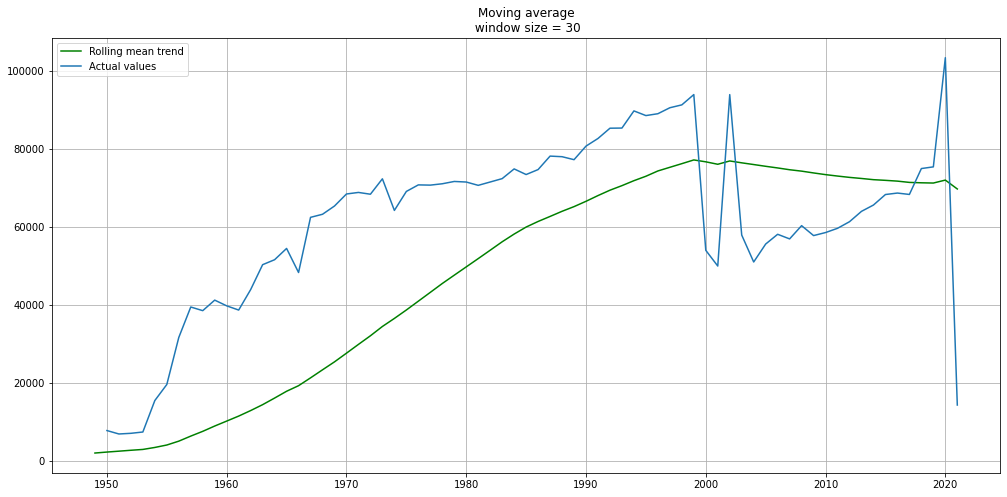

In [ ]:
# plotting the moving average for increase in the popularity of songs over the years.
plot_moving_average(popularity_song.popularity, 30)

In [ ]:
# Increase in the number of artists over the year
artists_data = {}
# Avoid duplicates
added = []
for year in df['year'].unique():
    # temporary container 
    total_artist = []
    for artist in df[df.year == year]['artists'].unique():
        if artist not in added:
            total_artist.append(artist)
    artists_data[year] = len(total_artist)
    added.extend(total_artist)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


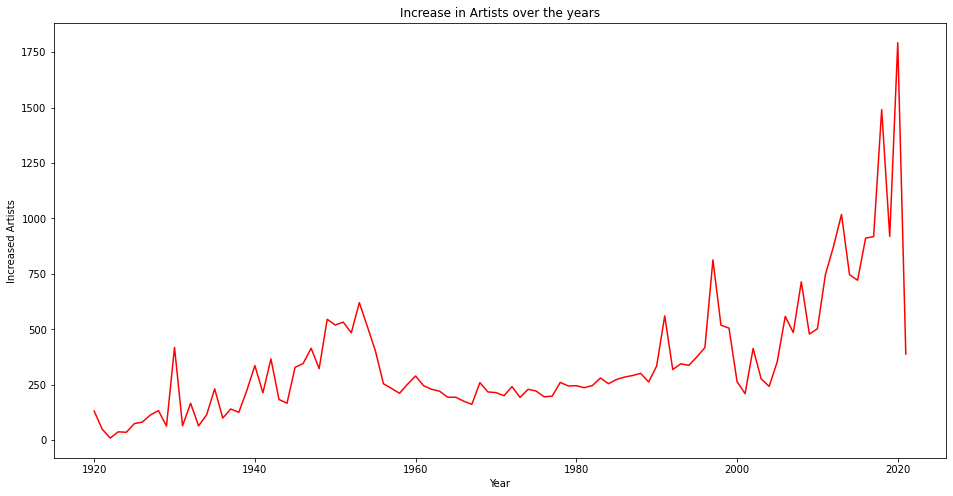

In [ ]:
# creating dataframe and plotting the graph
artists_rec = pd.DataFrame({'Year': list(artists_data.keys()),
                              'Increased_artists': list(artists_data.values())})
# line plot 
plt.figure(figsize=(16, 8))
sns.lineplot('Year', 'Increased_artists', color='red', data=artists_rec)
plt.title('Increase in Artists over the years')
plt.xlabel('Year')
plt.ylabel('Increased Artists')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Year')

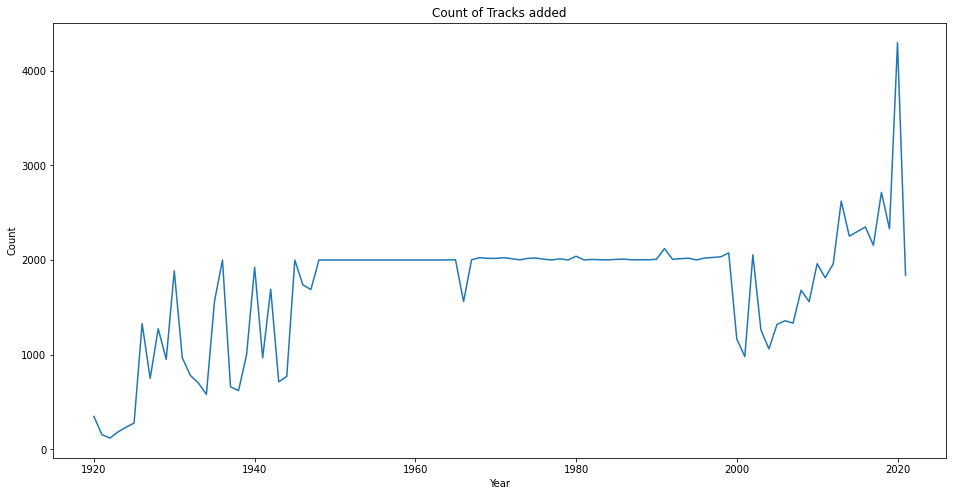

In [ ]:
# plotting the count of tracks over the years
plt.figure(figsize=(16, 8))

x = df.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

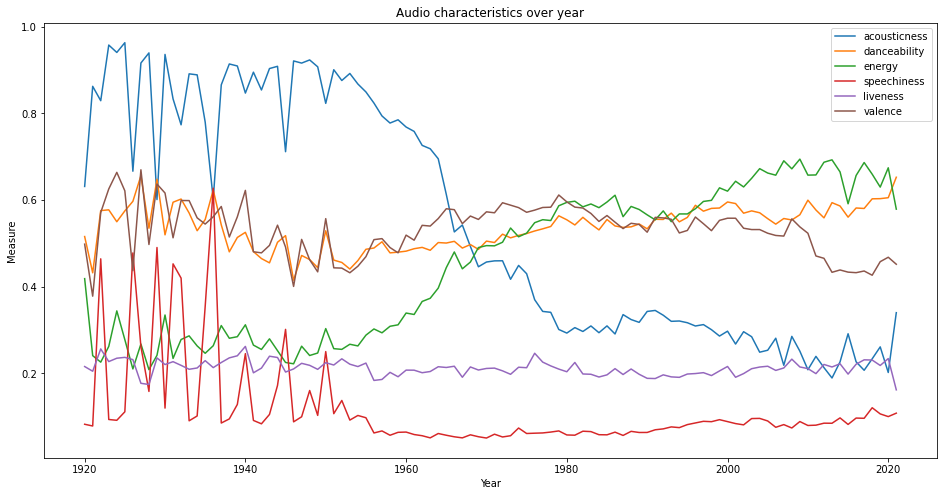

In [ ]:
# analyzing trends in audio charecteristics over the years
plt.figure(figsize=(16, 8))

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

Observations from time series analysis:


*   From the no. of songs vs the popularity graph, we can see that they are proportional to each other, meaning increase in count also meants more popular songs.
*   We have calculated moving average for the count of the songs over the years and popularity of songs. From this we can interpret that given a window of 30 days there will be decline in both count and popularity of the songs.


*  The increase in total number of artists since 1920 have gradual upwards journey, but it is observed that there is a steep fall in 2020.
*   Coming to the count of songs over the years, there have been same number of songs released each year between 1940 and 2000. Then there was a spike, but again, a steep fall similar to the number of artists.


*   Roughly 2000 tracks are added to spotify every year.
*   Tracks have become more Energetic and Danceable in the recent years. The loudness and tempo has also increased. The tracks have become less "Acoustic"












# Popularity Analysis

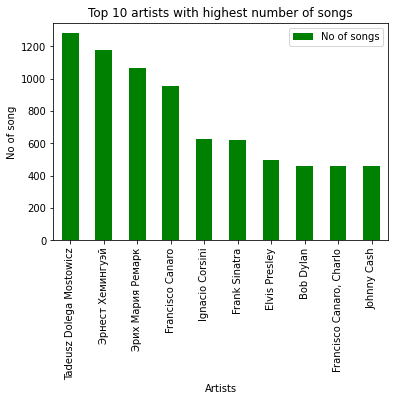

In [ ]:
# Top 10 artists with highest number of songs
top_10 = pd.DataFrame({'No of songs':df['artists'].value_counts().head(10)})
top_10.plot.bar(color='green')
plt.title('Top 10 artists with highest number of songs')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

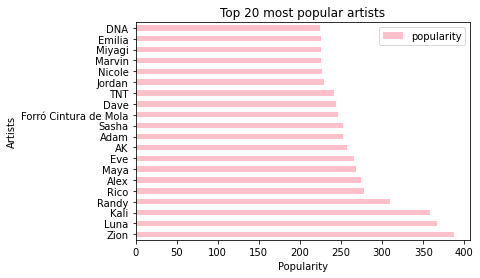

In [ ]:
# Top 20 artists most popular artists
artists = art_df.groupby(['name'])
top_20 = artists[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
top_20.plot.barh(color='pink')
plt.title('Top 20 most popular artists')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

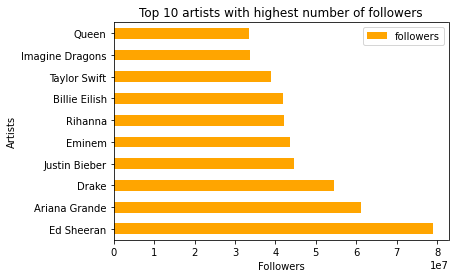

In [ ]:
# Top 10 artists with highest number of followers
art = art_df.groupby(['name'])
top_10_followers = art[['followers']].sum().sort_values(by=['followers'], ascending=False)[:10]
top_10_followers.plot.barh(color='orange')
plt.title('Top 10 artists with highest number of followers')
plt.xlabel('Followers')
plt.ylabel('Artists')
plt.show()

In [ ]:
# Top 10 most popular songs
top_10_track = track_df.sort_values(by=['popularity'], ascending=False)[:10]
top_10_track[['name', 'artists']]

,name,artists
93802,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon"
93803,drivers license,Olivia Rodrigo
93804,Astronaut In The Ocean,Masked Wolf
92810,Save Your Tears,The Weeknd
92811,telepatía,Kali Uchis
93805,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic"
92813,Blinding Lights,The Weeknd
92814,The Business,Tiësto
92816,Heartbreak Anniversary,Giveon
92819,Bandido,"Myke Towers, Juhn"


In [ ]:
# Most popular track per decade
track_year = track_df.sort_values(by=['year'], ascending= False)
track_max = track_year.groupby(['year'])
track_max = track_year.groupby(['year'])['popularity'].transform(max) == track_year['popularity']

track_year = track_year[track_max]
track_year[['name', 'artists', 'year']]

,name,artists,year
93802,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",2021
92811,telepatía,Kali Uchis,2020
92810,Save Your Tears,The Weeknd,2020
91866,Streets,Doja Cat,2019
90900,lovely (with Khalid),"Billie Eilish, Khalid",2018
...,...,...,...
1128,"On the Sunny Side of the Street (From ""Is Ever...",Tommy Dorsey,1925
159256,After You've Gone,Bessie Smith,1924
149,Nobody Knows You When You're Down and Out,Bessie Smith,1923
0,Carve,Uli,1922


# Genre grouping using k-means clustering technique

Here, we are trying to group the songs into genres by assessing their charecteristics. We are using the k-means clustering technique for this purpose.

In [ ]:
# clustering
# data(columns) we will we using
song_characteristics = pd.DataFrame()
# normalizer instance
scaler = MinMaxScaler()
for col in df.iloc[:,:-1].columns:      # excluding year col i.e, of int64 type
    if df[col].dtypes in ['float64', 'int64']:
        # adding normalized col
        scaler.fit(df[[col]])
        song_characteristics[col] = scaler.transform(df[col].values.reshape(-1,1)).ravel()  

In [ ]:
# first we would like to know that how many cluster or to say Genres can be clustered 
# with less SSE(Sum of Squared Error) we will use "Elbow method" to find out 

# KMeans instance
km = KMeans()
k_rng = range(1,200)  # k value
sse = [] # sse value for each k
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_characteristics.sample(1000))
    # calculating sse
    sse.append(km.inertia_) 

# 1000 sample of whole data should be able depict actual

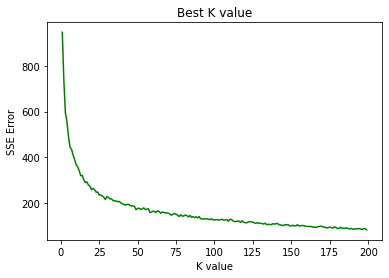

In [ ]:
plt.plot(k_rng, sse, color = 'green')
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
# plt.ylim(0,400)
# plt.xlim(0,100)
plt.show()

In [ ]:
# 25 is a good value of K
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_characteristics)

In [ ]:
song_characteristics['predicted_genres'] = predicted_genres
song_characteristics['predicted_genres'] = song_characteristics['predicted_genres'].apply(lambda x: 'Genre'+ str(x))

In [ ]:
song_characteristics.sample(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,predicted_genres
71080,0.056225,0.584008,0.039522,0.744,0.0,0.000000,0.090909,0.7690,0.816569,1.0,0.37,0.089392,0.422542,0.715,Genre12
13209,0.994980,0.481781,0.025104,0.187,0.0,0.000168,0.000000,0.3140,0.749839,0.0,0.48,0.041092,0.398280,0.667,Genre6
139415,0.363454,0.480769,0.035759,0.370,0.0,0.000048,0.636364,0.3490,0.714807,1.0,0.45,0.048404,0.415606,0.402,Genre10
46164,0.865462,0.235830,0.030894,0.197,0.0,0.000000,0.000000,0.0927,0.692381,1.0,0.24,0.031823,0.731388,0.261,Genre14
42236,0.990964,0.775304,0.026764,0.579,0.0,0.233000,0.636364,0.0838,0.780816,1.0,0.00,0.175077,0.387997,0.909,Genre16
136199,0.311245,0.353239,0.026682,0.364,0.0,0.784000,0.454545,0.5840,0.755916,0.0,0.31,0.036457,0.314340,0.133,Genre19
30640,0.576305,0.300607,0.039194,0.481,0.0,0.003520,0.000000,0.0940,0.819341,1.0,0.46,0.028630,0.574505,0.456,Genre11
71194,0.014558,0.760121,0.047899,0.761,0.0,0.000003,0.727273,0.0305,0.811980,1.0,0.38,0.151390,0.459202,0.661,Genre1
93499,0.004518,0.590081,0.068570,0.873,0.0,0.761000,0.363636,0.0717,0.832229,0.0,0.10,0.032956,0.525628,0.263,Genre19
107987,0.962851,0.520243,0.038462,0.524,0.0,0.873000,0.000000,0.7420,0.682875,0.0,0.15,0.224511,0.393073,0.460,Genre3


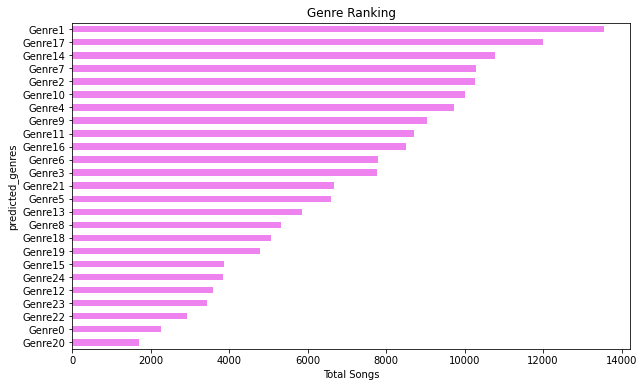

In [ ]:
# lets see how many songs falls in each Genre and which Genre has more songs
genres_group = song_characteristics.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_group.sort_values(ascending=True).plot.barh(color='violet')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()

# Genre - Song Recommender System

In [ ]:
artists_df = artists_df.rename(columns={"count": "playCount"})

In [ ]:
# we will replace each feature with its Genre 
artists_df.iloc[:,2:-2] = scaler.fit_transform(artists_df.iloc[:,2:-2])
km = KMeans(n_clusters=25)
artists_df['genres'] = km.fit_predict(artists_df.iloc[:,2:-2])
artists_df = artists_df.iloc[:,[0,-3,-2,-1,]]
artists_df.head()

,genres,key,mode,playCount
0,1,0.454545,1,9
1,23,0.454545,1,26
2,23,0.000000,1,7
3,23,0.000000,1,27
4,1,0.454545,1,7


In [ ]:
# lets create our own user list with the user's rating and add to artists data
artists_df['user_id'] = np.random.randint(100,200,len(artists_df))
artists_df['rating'] = np.random.randint(1,6,len(artists_df))
artists_df.head()

,genres,key,mode,playCount,user_id,rating
0,1,0.454545,1,9,191,3
1,23,0.454545,1,26,194,2
2,23,0.000000,1,7,124,4
3,23,0.000000,1,27,195,1
4,1,0.454545,1,7,116,5


In [ ]:
# Recommender System
def recommend(user):
    """This function will recommend genres to any user"""
    # Choosing user top liked genres
    fav_genre = artists_df[artists_df['user_id']==user].sort_values(by=['rating','playCount'], ascending=False)['genres'][:5]
    fav_genre = list(dict.fromkeys(fav_genre)) # removing duplicate if exits
    
    # Clearing out the genres from list whose songs has been listened by the user
    listened_genres = artists_df.index[artists_df['genres'].isin(['12','2'])].tolist()
    
    # Remaining data
    remaining_df = artists_df.drop(listened_genres, axis=0)
    recommended =  remaining_df[remaining_df['genres'].isin(fav_genre)]
    
    # Sorting the genre
    recommended = recommended.sort_values(by=['rating','playCount',], ascending=False)[['genres', 'rating', 'playCount']][:5]
    
    # output will contain artists name, genres, other useres rating and song played count
    return recommended

 Our recommendations:

In [ ]:
recommend(154)

,genres,rating,playCount
24342,15,5,922
14418,5,5,495
21819,15,5,373
12788,5,5,332
18846,15,5,304


Verifying if our recommender system made accurate recommendations:
Below is the actual list of genres the user listens to. Our recommended genres were 15 and 5. They are present in the below array. Therefore, our recommender system has made accurate recommendations.

In [ ]:
# Checking which genres are user favourites and did they get same recommendations
artists_df[artists_df.user_id==106].sort_values(by='rating')['genres'].unique()

array([10, 13,  4,  5, 14, 21, 17, 23,  9,  1,  7, 16,  0, 15,  8,  3,  2,
        6, 18, 20, 24, 12, 19, 11, 22], dtype=int32)